In [1]:
import numpy as np
import pandas as pd

import torch
import torch.nn

from times import StyleScoreVAE
from ssvae_trainer import SSVAETrainer

import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
mf = pd.read_csv('./dataset/multifactor_score_20200228.csv', index_col=0, header=0)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
mf[mf['code'] == 'A005930']

code  trade_date      pm_5     pm_10     pm_20     pm_40     pm_60  \
540417  A005930  2013-01-16  0.307322  0.214752  0.269412  0.615642  0.538814   
540418  A005930  2013-01-17  0.275159  0.235175  0.278858  0.608623  0.549606   
540419  A005930  2013-01-18  0.273983  0.232215  0.232686  0.571636  0.521329   
540420  A005930  2013-01-21  0.249077  0.293283  0.155408  0.495594  0.501984   
540421  A005930  2013-01-22  0.252724  0.261267  0.181221  0.475156  0.530265   
...         ...         ...       ...       ...       ...       ...       ...   
542161  A005930  2020-02-24  0.481342  0.594053  0.524048  0.629722  0.570931   
542162  A005930  2020-02-25  0.621167  0.622022  0.490795  0.635911  0.574655   
542163  A005930  2020-02-26  0.544780  0.594731  0.487116  0.628956  0.568410   
542164  A005930  2020-02-27  0.623055  0.587245  0.526480  0.622305  0.569714   
542165  A005930  2020-02-28  0.545897  0.541526  0.588398  0.619075  0.568255   

           pm_90    pm_120    pm_250  ...  skew_250  turnover_5  turnover_10  \
540417  0.557029  0.584363  0.605800  ...  0.746597         1.0          1.0   
540418  0.566829  0.570318  0.606448  ...  0.745504         1.0          1.0   
540419  0.555522  0.538045  0.600005  ...  0.746695         1.0          1.0   
540420  0.552491  0.519721  0.574298  ...  0.737737         1.0          1.0   
540421  0.524139  0.514964  0.578236  ...  0.738419         1.0          1.0   
...          ...       ...       ...  ...       ...         ...          ...   
542161  0.456609  0.621955  0.587540  ...  0.504917         1.0          1.0   
542162  0.455983  0.633129  0.583706  ...  0.504948         1.0          1.0   
542163  0.574070  0.631351  0.586203  ...  0.504860         1.0          1.0   
542164  0.572765  0.635776  0.581822  ...  0.504515         1.0          1.0   
542165  0.569805  0.630483  0.577924  ...  0.504477         1.0          1.0   

        turnover_20  turnover_40  turnover_60  turnover_90  turnover_120  \
540417          1.0          1.0          1.0          1.0           1.0   
540418          1.0          1.0          1.0          1.0           1.0   
540419          1.0          1.0          1.0          1.0           1.0   
540420          1.0          1.0          1.0          1.0           1.0   
540421          1.0          1.0          1.0          1.0           1.0   
...             ...          ...          ...          ...           ...   
542161          1.0          1.0          1.0          1.0           1.0   
542162          1.0          1.0          1.0          1.0           1.0   
542163          1.0          1.0          1.0          1.0           1.0   
542164          1.0          1.0          1.0          1.0           1.0   
542165          1.0          1.0          1.0          1.0           1.0   

        turnover_250  log_mktcap  
540417           1.0         1.0  
540418           1.0         1.0  
540419           1.0         1.0  
540420           1.0         1.0  
540421           1.0         1.0  
...              ...         ...  
542161           1.0         1.0  
542162           1.0         1.0  
542163           1.0         1.0  
542164           1.0         1.0  
542165           1.0         1.0  

[1749 rows x 43 columns]

In [5]:
ssvae = StyleScoreVAE(41)

In [6]:
trainer = SSVAETrainer(ssvae, train_dataset=mf.values[:, 2:], test_dataset=mf.values[-100:, 2:],
                       beta=0.5, alpha=1000)

In [7]:
trainer.train(epochs=10, batch_size=1024)

0 obj_loss: 107.52, recon: 35.09, overlap: 0.0086, sparsity: 0.0001: 100%|█████████| 3900/3900 [17:33<00:00,  3.70it/s]
1 obj_loss: 26.21, recon: 37.53, overlap: 0.0082, sparsity: 0.0001: 100%|██████████| 3900/3900 [17:30<00:00,  3.71it/s]
2 obj_loss: -19.80, recon: 37.85, overlap: 0.0082, sparsity: 0.0000: 100%|█████████| 3900/3900 [17:21<00:00,  3.75it/s]
3 obj_loss: -19.33, recon: 38.04, overlap: 0.0081, sparsity: 0.0000: 100%|█████████| 3900/3900 [17:19<00:00,  3.75it/s]
4 obj_loss: -4.78, recon: 38.43, overlap: 0.0081, sparsity: 0.0000: 100%|██████████| 3900/3900 [17:19<00:00,  3.75it/s]
5 obj_loss: -21.45, recon: 38.43, overlap: 0.0082, sparsity: 0.0000: 100%|█████████| 3900/3900 [17:19<00:00,  3.75it/s]
6 obj_loss: -23.39, recon: 38.39, overlap: 0.0082, sparsity: 0.0000: 100%|█████████| 3900/3900 [17:19<00:00,  3.75it/s]
7 obj_loss: -24.14, recon: 38.88, overlap: 0.0084, sparsity: 0.0000: 100%|█████████| 3900/3900 [17:19<00:00,  3.75it/s]
8 obj_loss: -17.80, recon: 39.08, overla

In [8]:
len(trainer.train_results['train_obj_loss'])

10

In [9]:
import matplotlib.pyplot as plt

In [10]:
obj_loss = trainer.train_results['train_obj_loss']
recon_loss = trainer.train_results['train_recon_loss']
overlap_loss = trainer.train_results['train_overlap_loss']
sparsity_loss = trainer.train_results['train_sparsity_loss']

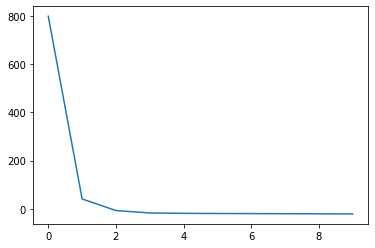

In [11]:
plt.plot(np.arange(len(obj_loss)), obj_loss)

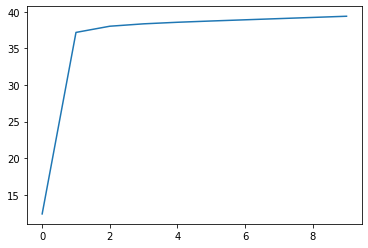

In [12]:
plt.plot(np.arange(len(recon_loss)), recon_loss)

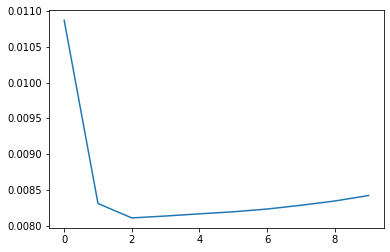

In [13]:
plt.plot(np.arange(len(overlap_loss)), overlap_loss)

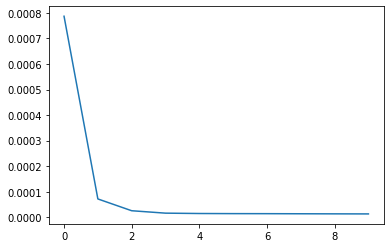

In [14]:
plt.plot(np.arange(len(sparsity_loss)), sparsity_loss)

In [15]:
trainer.trainset.shape

torch.Size([3993996, 41])

In [16]:
traverse = np.arange(-1., 1.1, 0.1).astype(float)

In [17]:
index = np.random.choice(np.arange(len(trainer.trainset)), 500, replace=False)

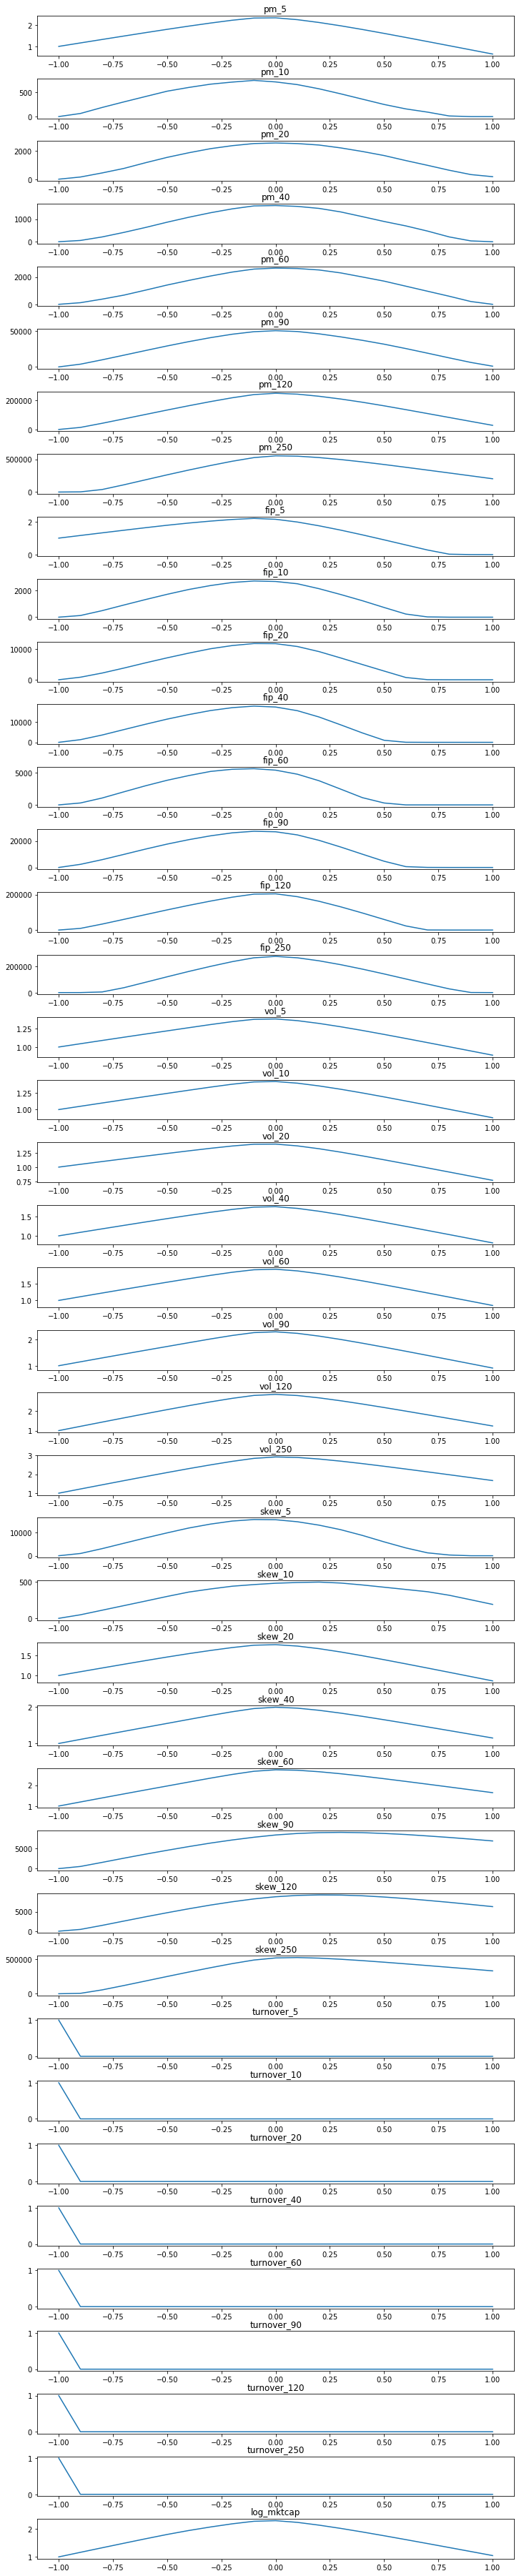

In [18]:
# Style 1
traversals = np.zeros((len(traverse), 41))
for i in range(len(index)):
    x = trainer.trainset[index[i]].to(ssvae.device)
    qz_x, px_z, style_score = ssvae(x.unsqueeze(0), K=100)

    traversal = []
    for t in traverse:
        t_style = torch.zeros_like(style_score).to(ssvae.device)
        t_style[0, :] = style_score[0]
        t_style[0, 0] = t
        recon, _ = ssvae.dec(t_style)
        traversal.append(recon.squeeze(0).cpu().detach().numpy())
    traversal = np.array(traversal)
    for i in range(41):
        if traversal[0, i] == 0.:
            traversal[0, i] += 1e-6
        traversal[:, i] /= traversal[0, i]
    traversal = np.array(traversal)
    traversals += traversal
traversals /= len(index)

fig, axs = plt.subplots(traversals.shape[1], 1)
fig.set_figheight(50)
fig.set_figwidth(10)
fig.tight_layout()
for i in range(traversals.shape[1]):
    axs[i].plot(traverse, traversals[:, i])
    #axs[i].set_ylim(ymax=traversals.max(), ymin=traversals.min())
    axs[i].set_title(mf.columns[2 + i])

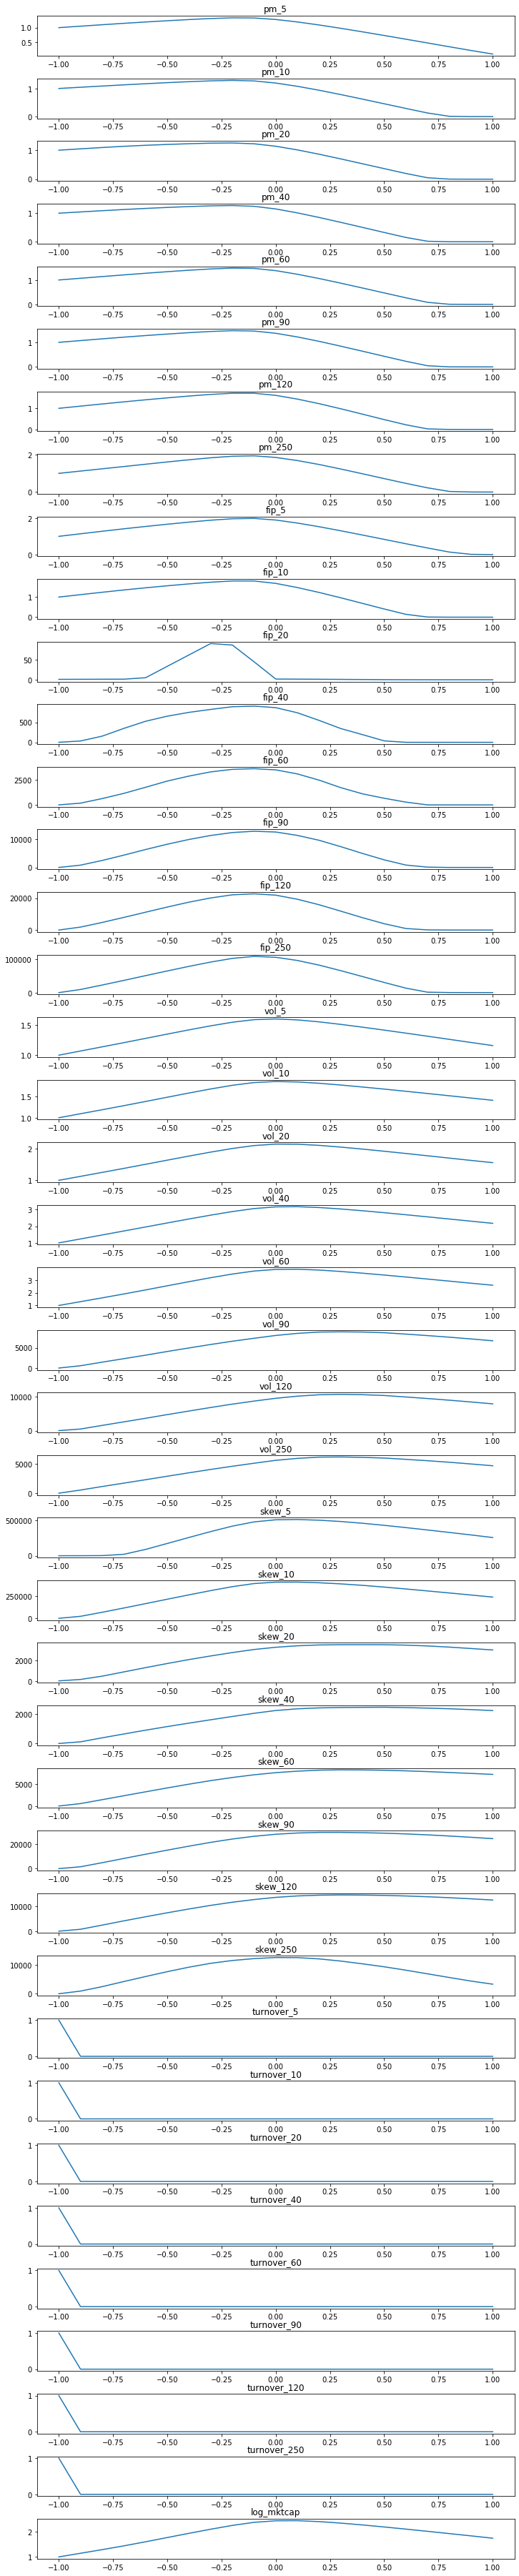

In [19]:
# Style 2
traversals = np.zeros((len(traverse), 41))
for i in range(len(index)):
    x = trainer.trainset[index[i]].to(ssvae.device)
    qz_x, px_z, style_score = ssvae(x.unsqueeze(0), K=100)

    traversal = []
    for t in traverse:
        t_style = torch.zeros_like(style_score).to(ssvae.device)
        t_style[0, :] = style_score[0]
        t_style[0, 1] = t
        recon, _ = ssvae.dec(t_style)
        traversal.append(recon.squeeze(0).cpu().detach().numpy())
    traversal = np.array(traversal)
    for i in range(41):
        if traversal[0, i] == 0.:
            traversal[0, i] += 1e-6
        traversal[:, i] /= traversal[0, i]
    traversal = np.array(traversal)
    traversals += traversal
traversals /= len(index)

fig, axs = plt.subplots(traversals.shape[1], 1)
fig.set_figheight(50)
fig.set_figwidth(10)
fig.tight_layout()
for i in range(traversals.shape[1]):
    axs[i].plot(traverse, traversals[:, i])
    #axs[i].set_ylim(ymax=traversals.max(), ymin=traversals.min())
    axs[i].set_title(mf.columns[2 + i])

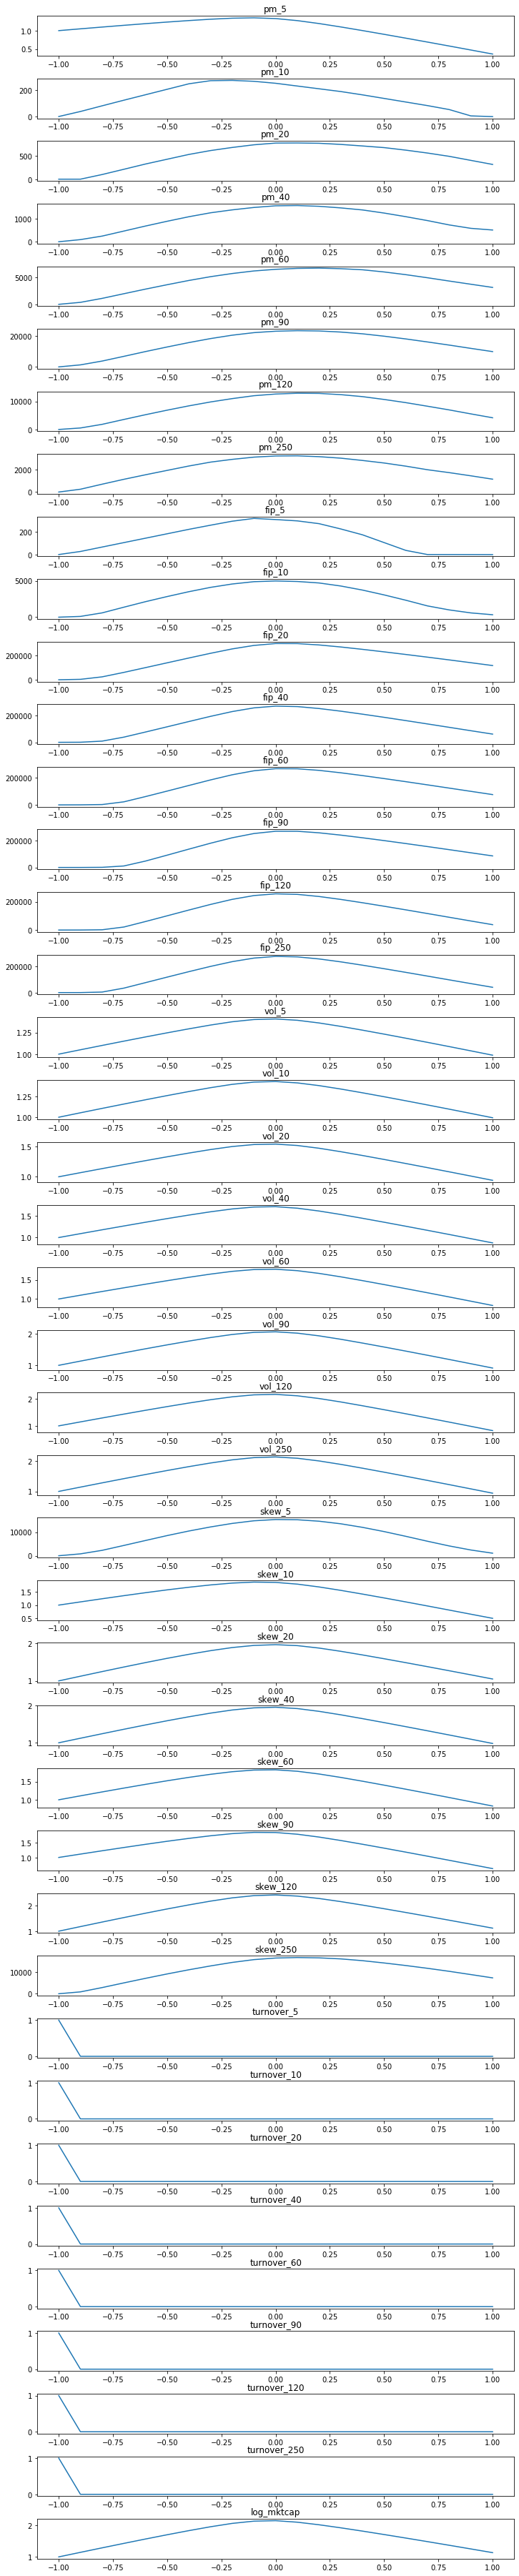

In [20]:
# Style 3
traversals = np.zeros((len(traverse), 41))
for i in range(len(index)):
    x = trainer.trainset[index[i]].to(ssvae.device)
    qz_x, px_z, style_score = ssvae(x.unsqueeze(0), K=100)

    traversal = []
    for t in traverse:
        t_style = torch.zeros_like(style_score).to(ssvae.device)
        t_style[0, :] = style_score[0]
        t_style[0, 2] = t
        recon, _ = ssvae.dec(t_style)
        traversal.append(recon.squeeze(0).cpu().detach().numpy())
    traversal = np.array(traversal)
    for i in range(41):
        if traversal[0, i] == 0.:
            traversal[0, i] += 1e-6
        traversal[:, i] /= traversal[0, i]
    traversal = np.array(traversal)
    traversals += traversal
traversals /= len(index)

fig, axs = plt.subplots(traversals.shape[1], 1)
fig.set_figheight(50)
fig.set_figwidth(10)
fig.tight_layout()
for i in range(traversals.shape[1]):
    axs[i].plot(traverse, traversals[:, i])
    #axs[i].set_ylim(ymax=traversals.max(), ymin=traversals.min())
    axs[i].set_title(mf.columns[2 + i])

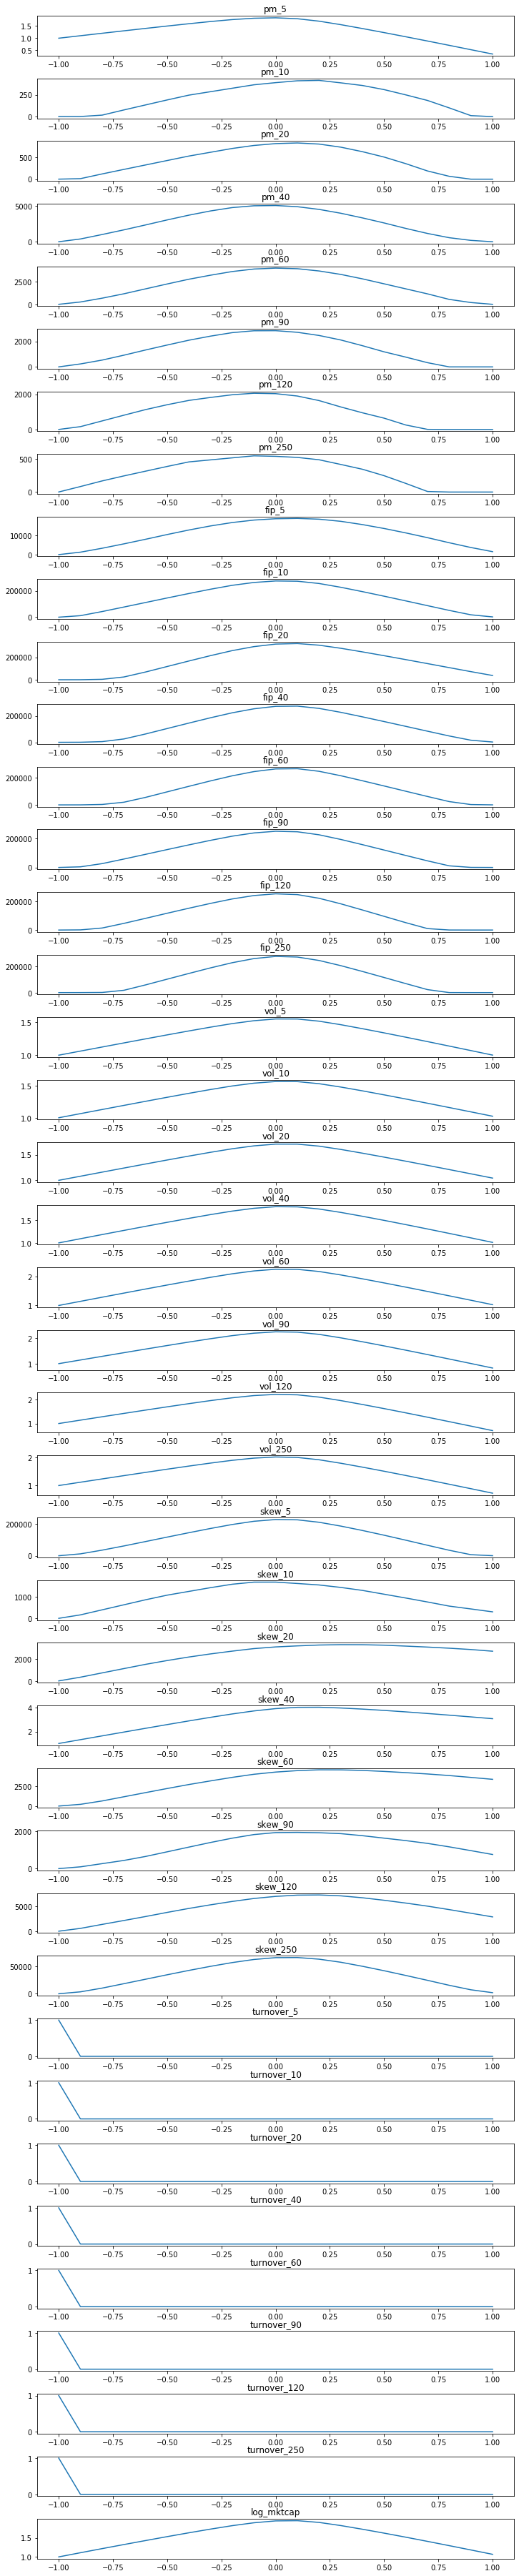

In [21]:
# Style 4
traversals = np.zeros((len(traverse), 41))
for i in range(len(index)):
    x = trainer.trainset[index[i]].to(ssvae.device)
    qz_x, px_z, style_score = ssvae(x.unsqueeze(0), K=100)

    traversal = []
    for t in traverse:
        t_style = torch.zeros_like(style_score).to(ssvae.device)
        t_style[0, :] = style_score[0]
        t_style[0, 3] = t
        recon, _ = ssvae.dec(t_style)
        traversal.append(recon.squeeze(0).cpu().detach().numpy())
    traversal = np.array(traversal)
    for i in range(41):
        if traversal[0, i] == 0.:
            traversal[0, i] += 1e-6
        traversal[:, i] /= traversal[0, i]
    traversal = np.array(traversal)
    traversals += traversal
traversals /= len(index)

fig, axs = plt.subplots(traversals.shape[1], 1)
fig.set_figheight(50)
fig.set_figwidth(10)
fig.tight_layout()
for i in range(traversals.shape[1]):
    axs[i].plot(traverse, traversals[:, i])
    #axs[i].set_ylim(ymax=traversals.max(), ymin=traversals.min())
    axs[i].set_title(mf.columns[2 + i])

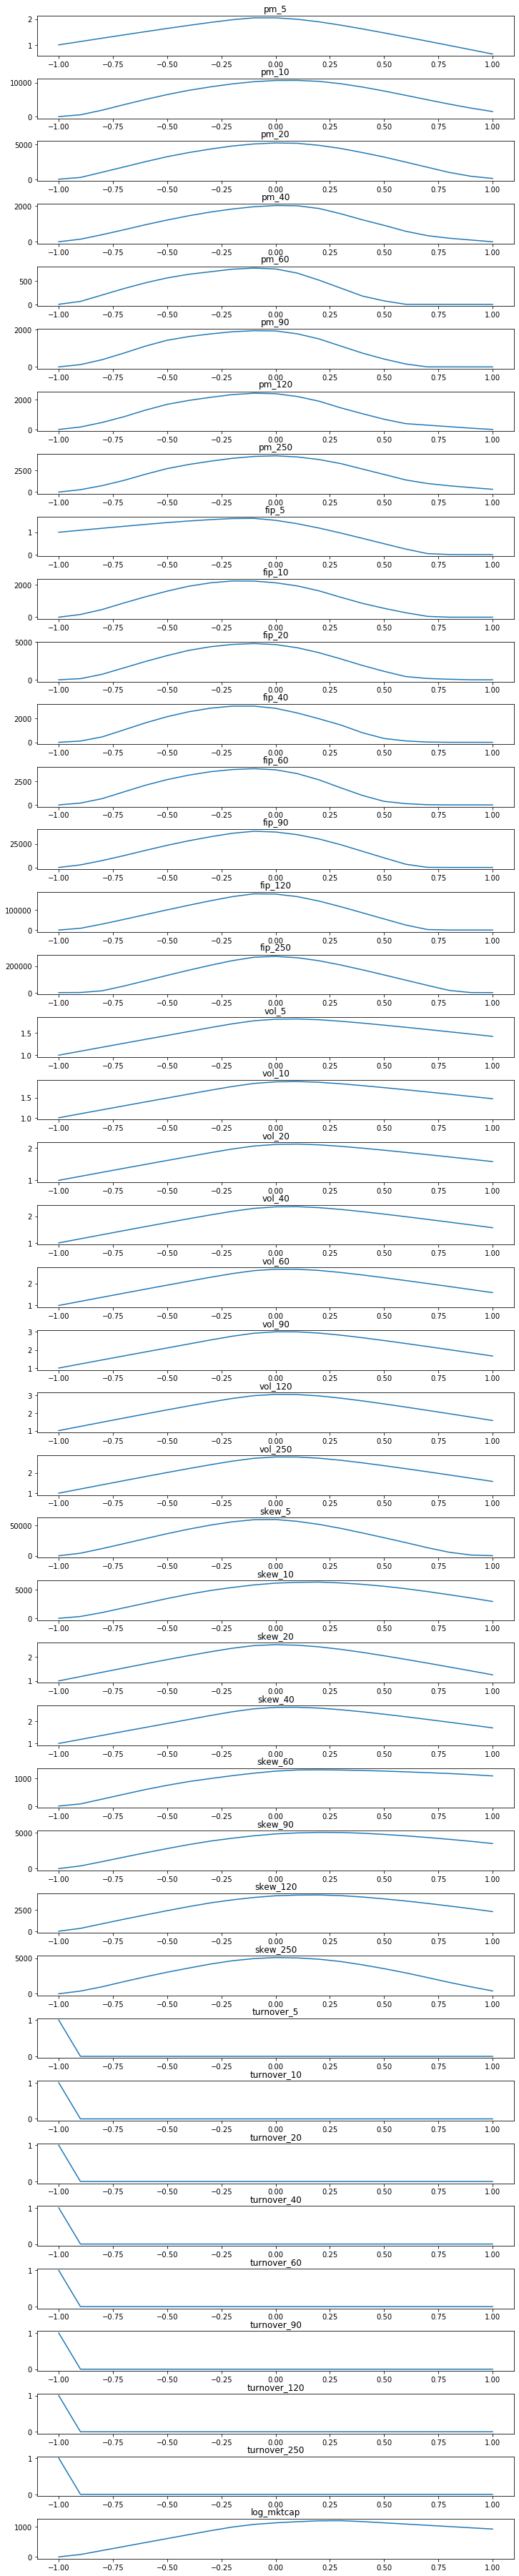

In [22]:
# Style 5
traversals = np.zeros((len(traverse), 41))
for i in range(len(index)):
    x = trainer.trainset[index[i]].to(ssvae.device)
    qz_x, px_z, style_score = ssvae(x.unsqueeze(0), K=100)

    traversal = []
    for t in traverse:
        t_style = torch.zeros_like(style_score).to(ssvae.device)
        t_style[0, :] = style_score[0]
        t_style[0, 4] = t
        recon, _ = ssvae.dec(t_style)
        traversal.append(recon.squeeze(0).cpu().detach().numpy())
    traversal = np.array(traversal)
    for i in range(41):
        if traversal[0, i] == 0.:
            traversal[0, i] += 1e-6
        traversal[:, i] /= traversal[0, i]
    traversal = np.array(traversal)
    traversals += traversal
traversals /= len(index)

fig, axs = plt.subplots(traversals.shape[1], 1)
fig.set_figheight(50)
fig.set_figwidth(10)
fig.tight_layout()
for i in range(traversals.shape[1]):
    axs[i].plot(traverse, traversals[:, i])
    #axs[i].set_ylim(ymax=traversals.max(), ymin=traversals.min())
    axs[i].set_title(mf.columns[2 + i])

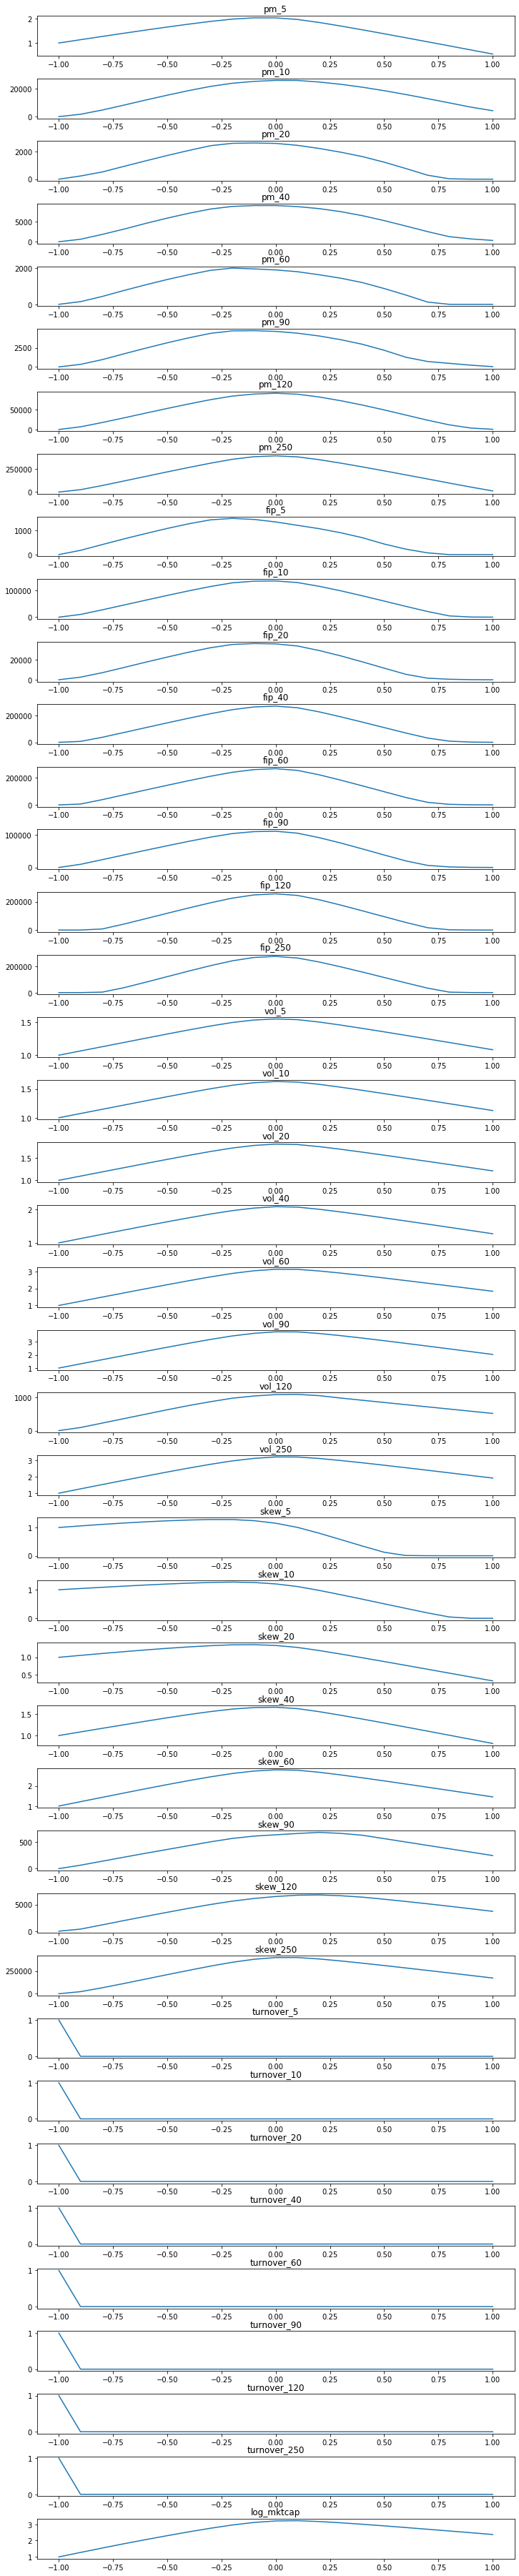

In [23]:
# Style 6
traversals = np.zeros((len(traverse), 41))
for i in range(len(index)):
    x = trainer.trainset[index[i]].to(ssvae.device)
    qz_x, px_z, style_score = ssvae(x.unsqueeze(0), K=100)

    traversal = []
    for t in traverse:
        t_style = torch.zeros_like(style_score).to(ssvae.device)
        t_style[0, :] = style_score[0]
        t_style[0, 5] = t
        recon, _ = ssvae.dec(t_style)
        traversal.append(recon.squeeze(0).cpu().detach().numpy())
    traversal = np.array(traversal)
    for i in range(41):
        if traversal[0, i] == 0.:
            traversal[0, i] += 1e-6
        traversal[:, i] /= traversal[0, i]
    traversal = np.array(traversal)
    traversals += traversal
traversals /= len(index)

fig, axs = plt.subplots(traversals.shape[1], 1)
fig.set_figheight(50)
fig.set_figwidth(10)
fig.tight_layout()
for i in range(traversals.shape[1]):
    axs[i].plot(traverse, traversals[:, i])
    #axs[i].set_ylim(ymax=traversals.max(), ymin=traversals.min())
    axs[i].set_title(mf.columns[2 + i])

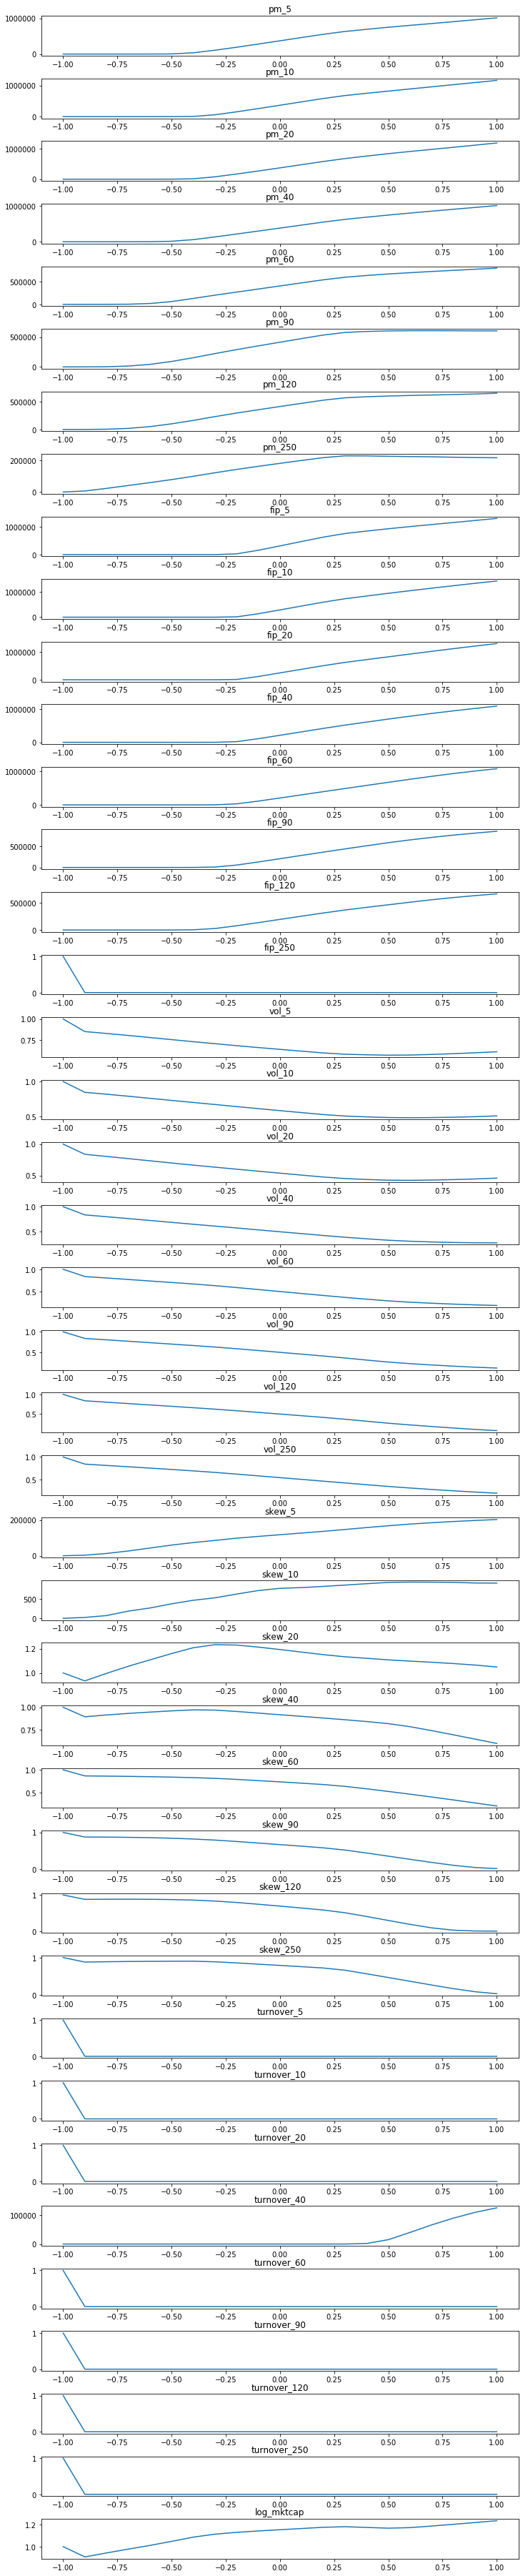

In [30]:
# Style 7
traversals = np.zeros((len(traverse), 41))
for i in range(len(index)):
    x = trainer.trainset[index[i]].to(ssvae.device)
    qz_x, px_z, style_score = ssvae(x.unsqueeze(0), K=100)

    traversal = []
    for t in traverse:
        t_style = torch.zeros_like(style_score).to(ssvae.device)
        t_style[0, :] = style_score[0]
        t_style[0, 6] = t
        recon, _ = ssvae.dec(t_style)
        traversal.append(recon.squeeze(0).cpu().detach().numpy())
    traversal = np.array(traversal)
    for i in range(41):
        if traversal[0, i] == 0.:
            traversal[0, i] += 1e-6
        traversal[:, i] /= traversal[0, i]
    traversal = np.array(traversal)
    traversals += traversal
traversals /= len(index)

fig, axs = plt.subplots(traversals.shape[1], 1)
fig.set_figheight(50)
fig.set_figwidth(10)
fig.tight_layout()
for i in range(traversals.shape[1]):
    axs[i].plot(traverse, traversals[:, i])
    #axs[i].set_ylim(ymax=traversals.max(), ymin=traversals.min())
    axs[i].set_title(mf.columns[2 + i])

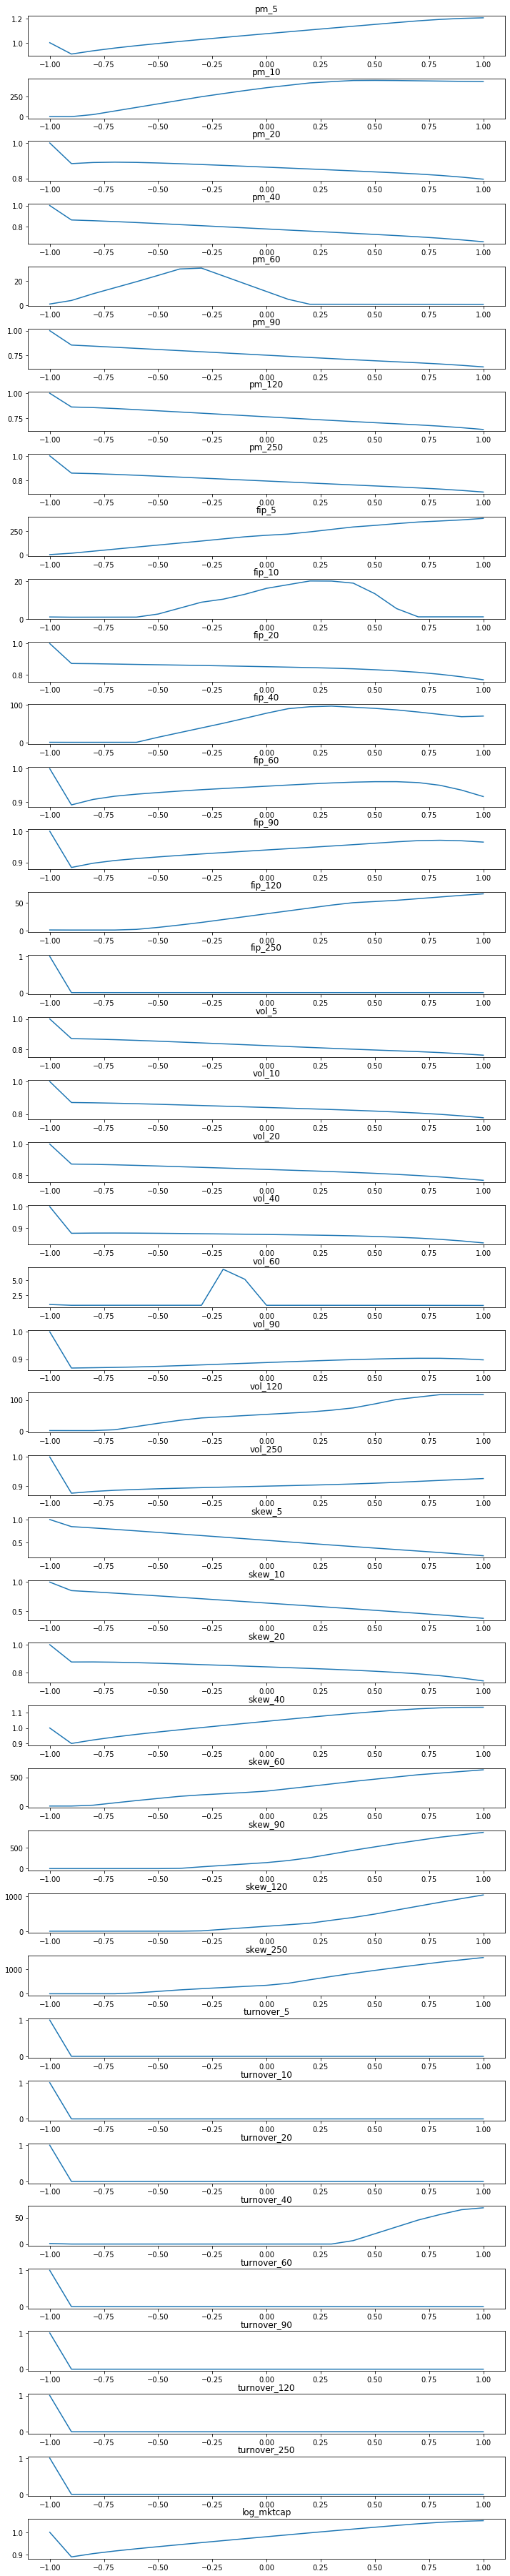

In [31]:
# Style 8
traversals = np.zeros((len(traverse), 41))
for i in range(len(index)):
    x = trainer.trainset[index[i]].to(ssvae.device)
    qz_x, px_z, style_score = ssvae(x.unsqueeze(0), K=100)

    traversal = []
    for t in traverse:
        t_style = torch.zeros_like(style_score).to(ssvae.device)
        t_style[0, :] = style_score[0]
        t_style[0, 7] = t
        recon, _ = ssvae.dec(t_style)
        traversal.append(recon.squeeze(0).cpu().detach().numpy())
    traversal = np.array(traversal)
    for i in range(41):
        if traversal[0, i] == 0.:
            traversal[0, i] += 1e-6
        traversal[:, i] /= traversal[0, i]
    traversal = np.array(traversal)
    traversals += traversal
traversals /= len(index)

fig, axs = plt.subplots(traversals.shape[1], 1)
fig.set_figheight(50)
fig.set_figwidth(10)
fig.tight_layout()
for i in range(traversals.shape[1]):
    axs[i].plot(traverse, traversals[:, i])
    #axs[i].set_ylim(ymax=traversals.max(), ymin=traversals.min())
    axs[i].set_title(mf.columns[2 + i])

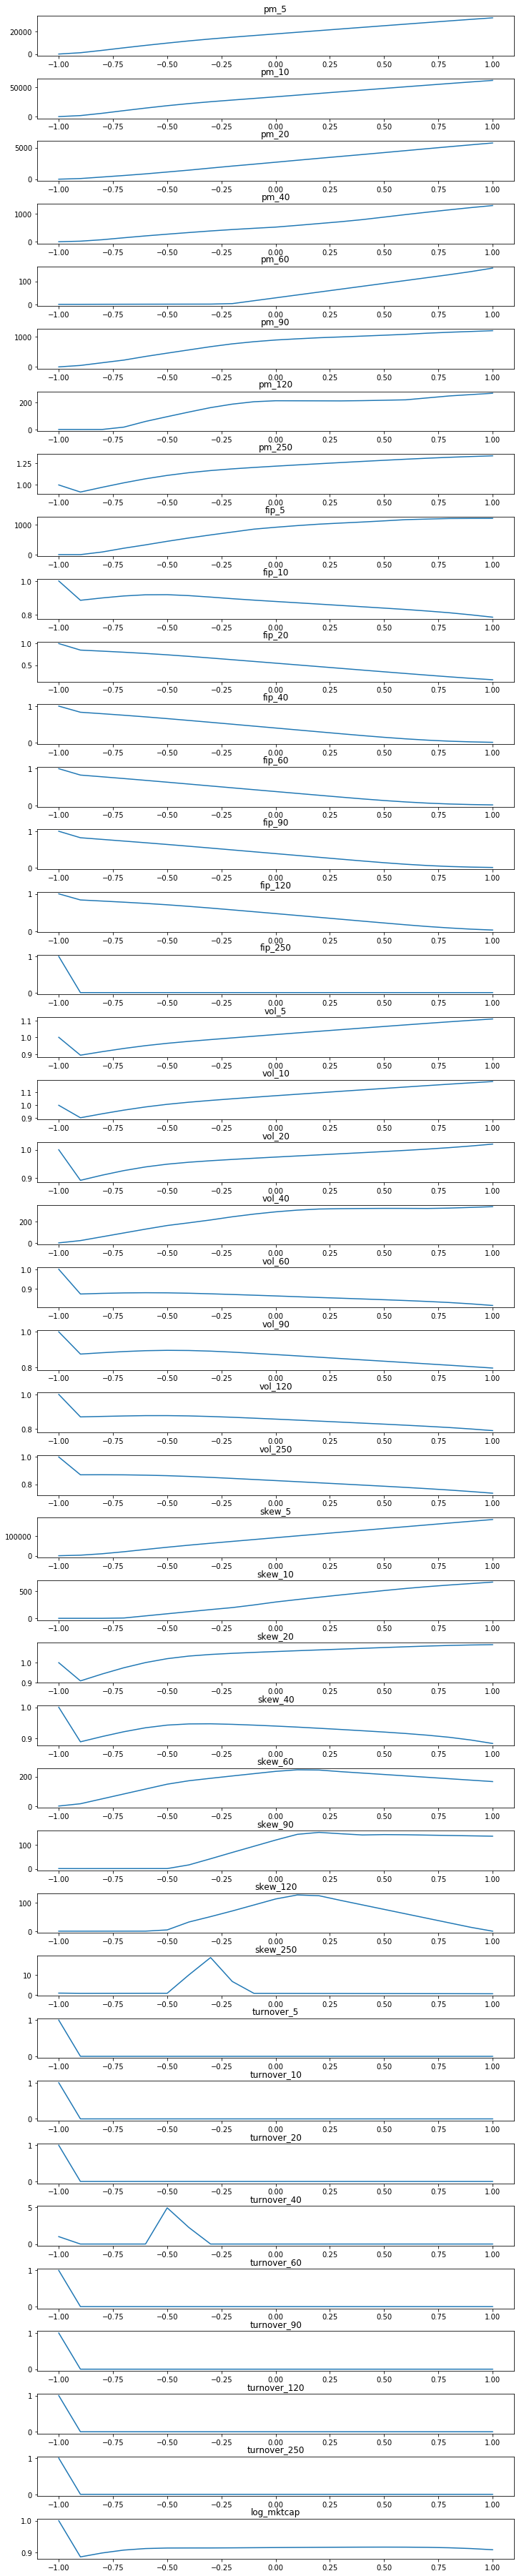

In [32]:
# Style 9
traversals = np.zeros((len(traverse), 41))
for i in range(len(index)):
    x = trainer.trainset[index[i]].to(ssvae.device)
    qz_x, px_z, style_score = ssvae(x.unsqueeze(0), K=100)

    traversal = []
    for t in traverse:
        t_style = torch.zeros_like(style_score).to(ssvae.device)
        t_style[0, :] = style_score[0]
        t_style[0, 8] = t
        recon, _ = ssvae.dec(t_style)
        traversal.append(recon.squeeze(0).cpu().detach().numpy())
    traversal = np.array(traversal)
    for i in range(41):
        if traversal[0, i] == 0.:
            traversal[0, i] += 1e-6
        traversal[:, i] /= traversal[0, i]
    traversal = np.array(traversal)
    traversals += traversal
traversals /= len(index)

fig, axs = plt.subplots(traversals.shape[1], 1)
fig.set_figheight(50)
fig.set_figwidth(10)
fig.tight_layout()
for i in range(traversals.shape[1]):
    axs[i].plot(traverse, traversals[:, i])
    #axs[i].set_ylim(ymax=traversals.max(), ymin=traversals.min())
    axs[i].set_title(mf.columns[2 + i])

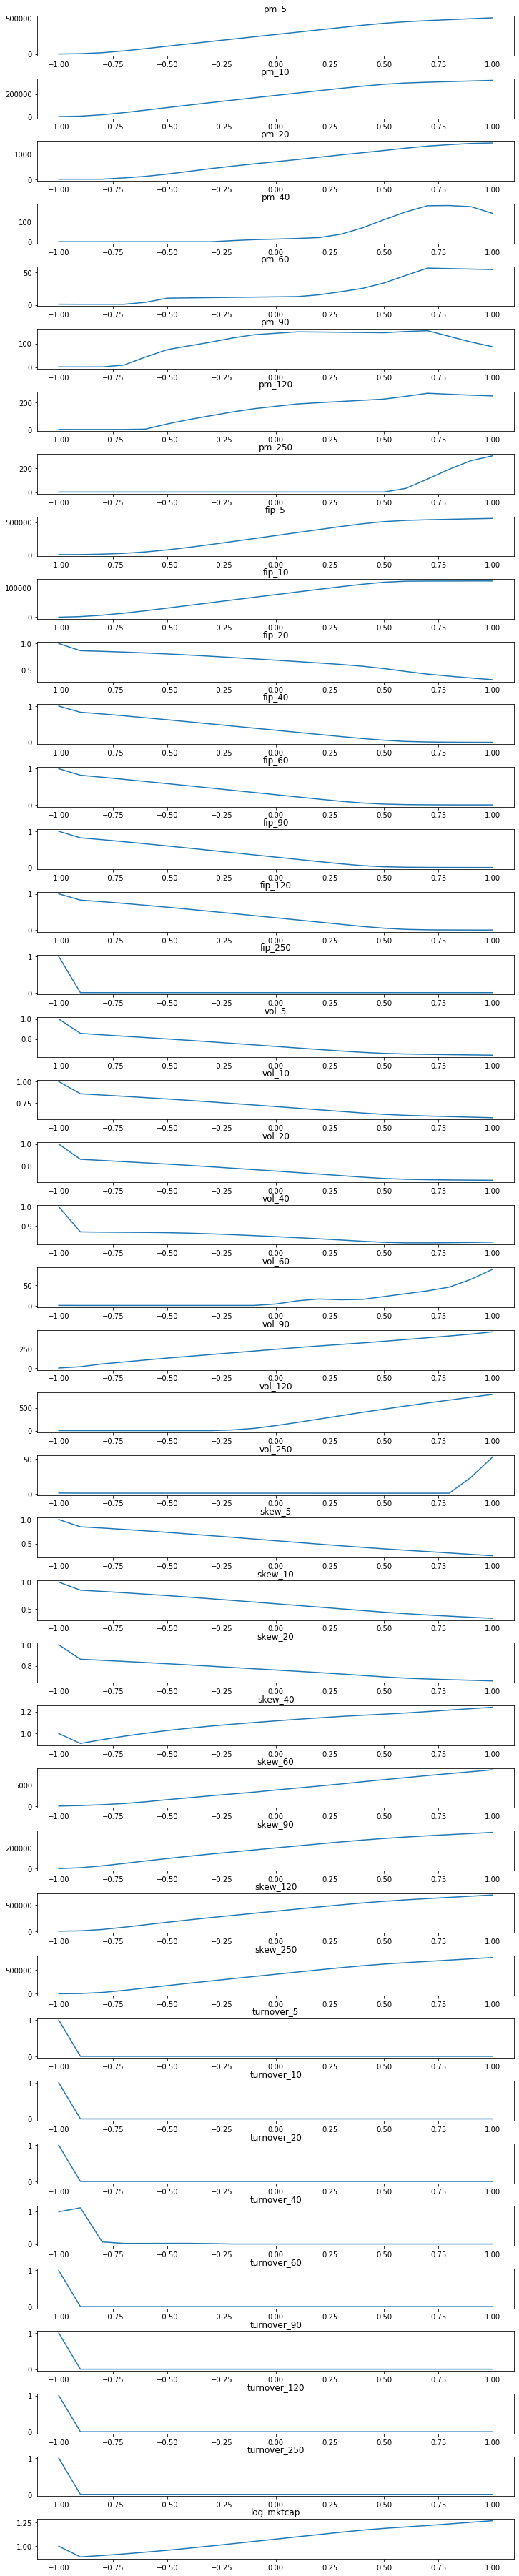

In [33]:
# Style 10
traversals = np.zeros((len(traverse), 41))
for i in range(len(index)):
    x = trainer.trainset[index[i]].to(ssvae.device)
    qz_x, px_z, style_score = ssvae(x.unsqueeze(0), K=100)

    traversal = []
    for t in traverse:
        t_style = torch.zeros_like(style_score).to(ssvae.device)
        t_style[0, :] = style_score[0]
        t_style[0, 9] = t
        recon, _ = ssvae.dec(t_style)
        traversal.append(recon.squeeze(0).cpu().detach().numpy())
    traversal = np.array(traversal)
    for i in range(41):
        if traversal[0, i] == 0.:
            traversal[0, i] += 1e-6
        traversal[:, i] /= traversal[0, i]
    traversal = np.array(traversal)
    traversals += traversal
traversals /= len(index)

fig, axs = plt.subplots(traversals.shape[1], 1)
fig.set_figheight(50)
fig.set_figwidth(10)
fig.tight_layout()
for i in range(traversals.shape[1]):
    axs[i].plot(traverse, traversals[:, i])
    #axs[i].set_ylim(ymax=traversals.max(), ymin=traversals.min())
    axs[i].set_title(mf.columns[2 + i])

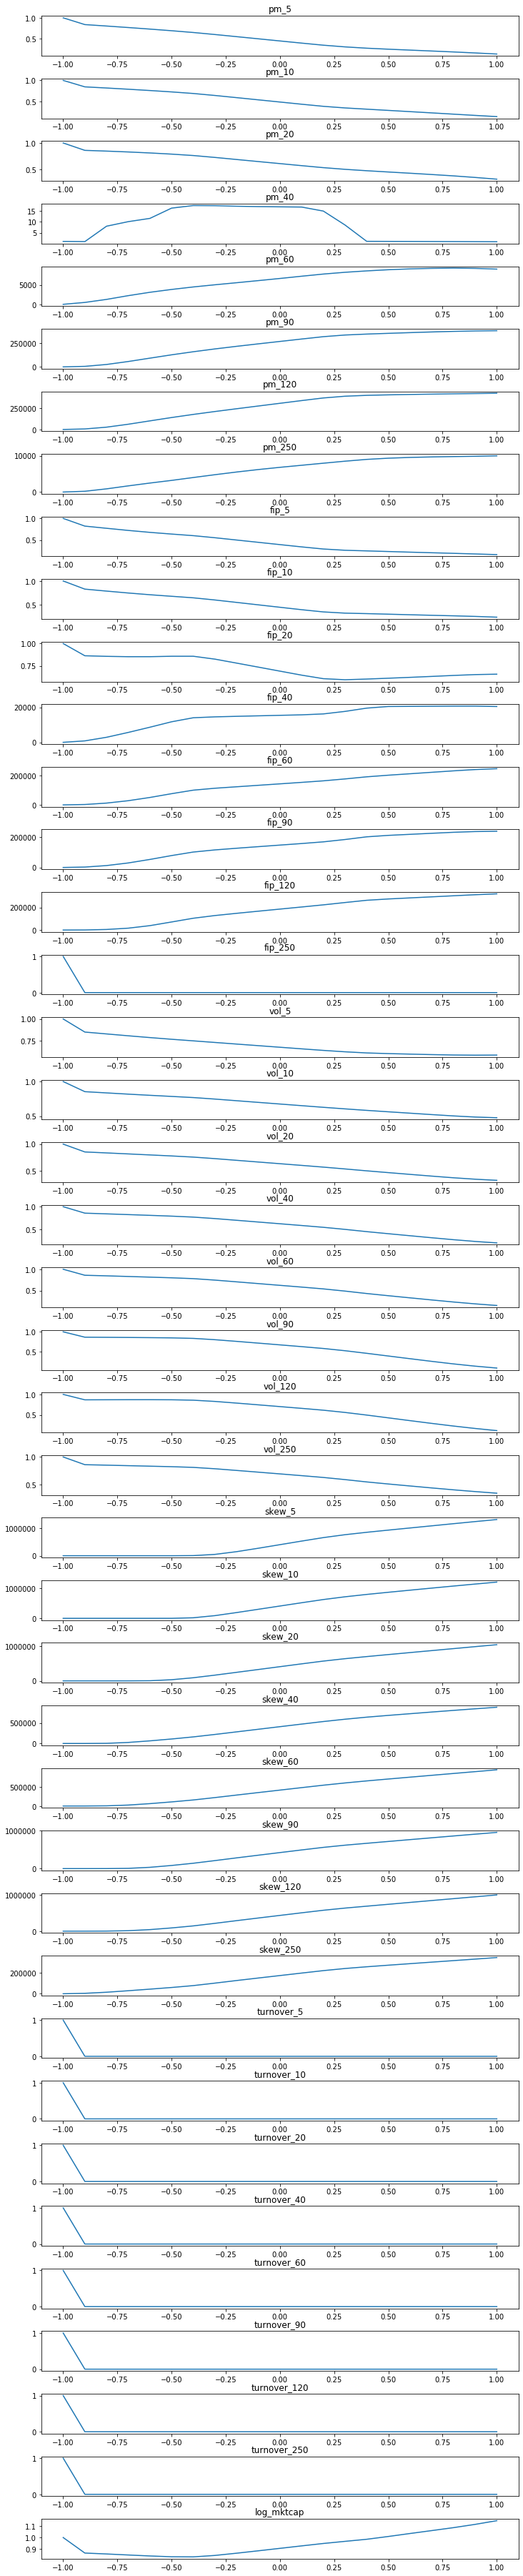

In [34]:
# Style 11
traversals = np.zeros((len(traverse), 41))
for i in range(len(index)):
    x = trainer.trainset[index[i]].to(ssvae.device)
    qz_x, px_z, style_score = ssvae(x.unsqueeze(0), K=100)

    traversal = []
    for t in traverse:
        t_style = torch.zeros_like(style_score).to(ssvae.device)
        t_style[0, :] = style_score[0]
        t_style[0, 10] = t
        recon, _ = ssvae.dec(t_style)
        traversal.append(recon.squeeze(0).cpu().detach().numpy())
    traversal = np.array(traversal)
    for i in range(41):
        if traversal[0, i] == 0.:
            traversal[0, i] += 1e-6
        traversal[:, i] /= traversal[0, i]
    traversal = np.array(traversal)
    traversals += traversal
traversals /= len(index)

fig, axs = plt.subplots(traversals.shape[1], 1)
fig.set_figheight(50)
fig.set_figwidth(10)
fig.tight_layout()
for i in range(traversals.shape[1]):
    axs[i].plot(traverse, traversals[:, i])
    #axs[i].set_ylim(ymax=traversals.max(), ymin=traversals.min())
    axs[i].set_title(mf.columns[2 + i])

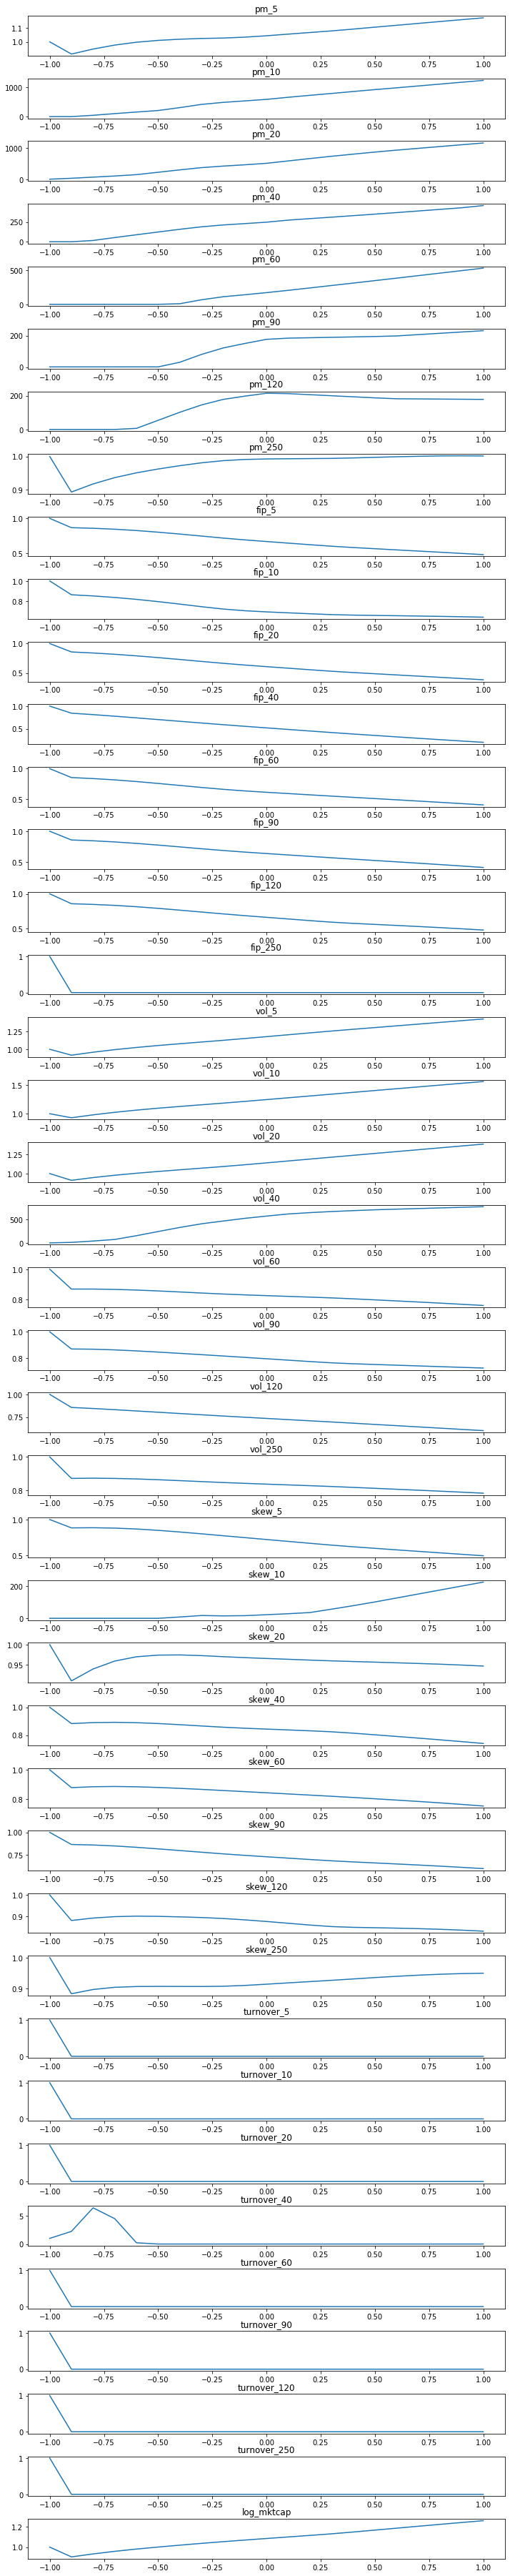

In [35]:
# Style 12
traversals = np.zeros((len(traverse), 41))
for i in range(len(index)):
    x = trainer.trainset[index[i]].to(ssvae.device)
    qz_x, px_z, style_score = ssvae(x.unsqueeze(0), K=100)

    traversal = []
    for t in traverse:
        t_style = torch.zeros_like(style_score).to(ssvae.device)
        t_style[0, :] = style_score[0]
        t_style[0, 11] = t
        recon, _ = ssvae.dec(t_style)
        traversal.append(recon.squeeze(0).cpu().detach().numpy())
    traversal = np.array(traversal)
    for i in range(41):
        if traversal[0, i] == 0.:
            traversal[0, i] += 1e-6
        traversal[:, i] /= traversal[0, i]
    traversal = np.array(traversal)
    traversals += traversal
traversals /= len(index)

fig, axs = plt.subplots(traversals.shape[1], 1)
fig.set_figheight(50)
fig.set_figwidth(10)
fig.tight_layout()
for i in range(traversals.shape[1]):
    axs[i].plot(traverse, traversals[:, i])
    #axs[i].set_ylim(ymax=traversals.max(), ymin=traversals.min())
    axs[i].set_title(mf.columns[2 + i])

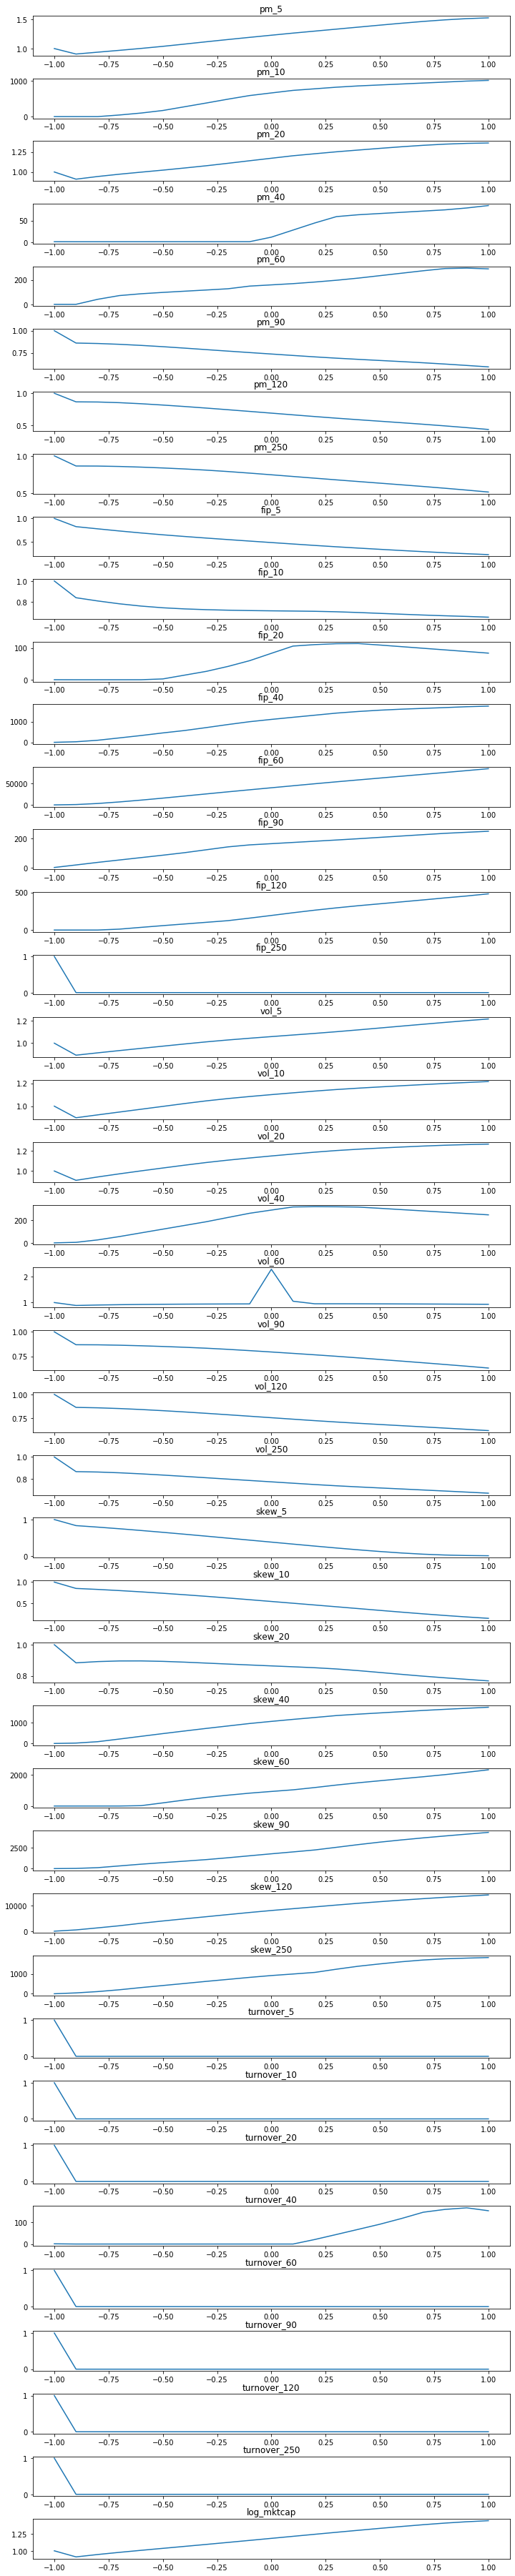

In [36]:
# Style 13
traversals = np.zeros((len(traverse), 41))
for i in range(len(index)):
    x = trainer.trainset[index[i]].to(ssvae.device)
    qz_x, px_z, style_score = ssvae(x.unsqueeze(0), K=100)

    traversal = []
    for t in traverse:
        t_style = torch.zeros_like(style_score).to(ssvae.device)
        t_style[0, :] = style_score[0]
        t_style[0, 12] = t
        recon, _ = ssvae.dec(t_style)
        traversal.append(recon.squeeze(0).cpu().detach().numpy())
    traversal = np.array(traversal)
    for i in range(41):
        if traversal[0, i] == 0.:
            traversal[0, i] += 1e-6
        traversal[:, i] /= traversal[0, i]
    traversal = np.array(traversal)
    traversals += traversal
traversals /= len(index)

fig, axs = plt.subplots(traversals.shape[1], 1)
fig.set_figheight(50)
fig.set_figwidth(10)
fig.tight_layout()
for i in range(traversals.shape[1]):
    axs[i].plot(traverse, traversals[:, i])
    #axs[i].set_ylim(ymax=traversals.max(), ymin=traversals.min())
    axs[i].set_title(mf.columns[2 + i])

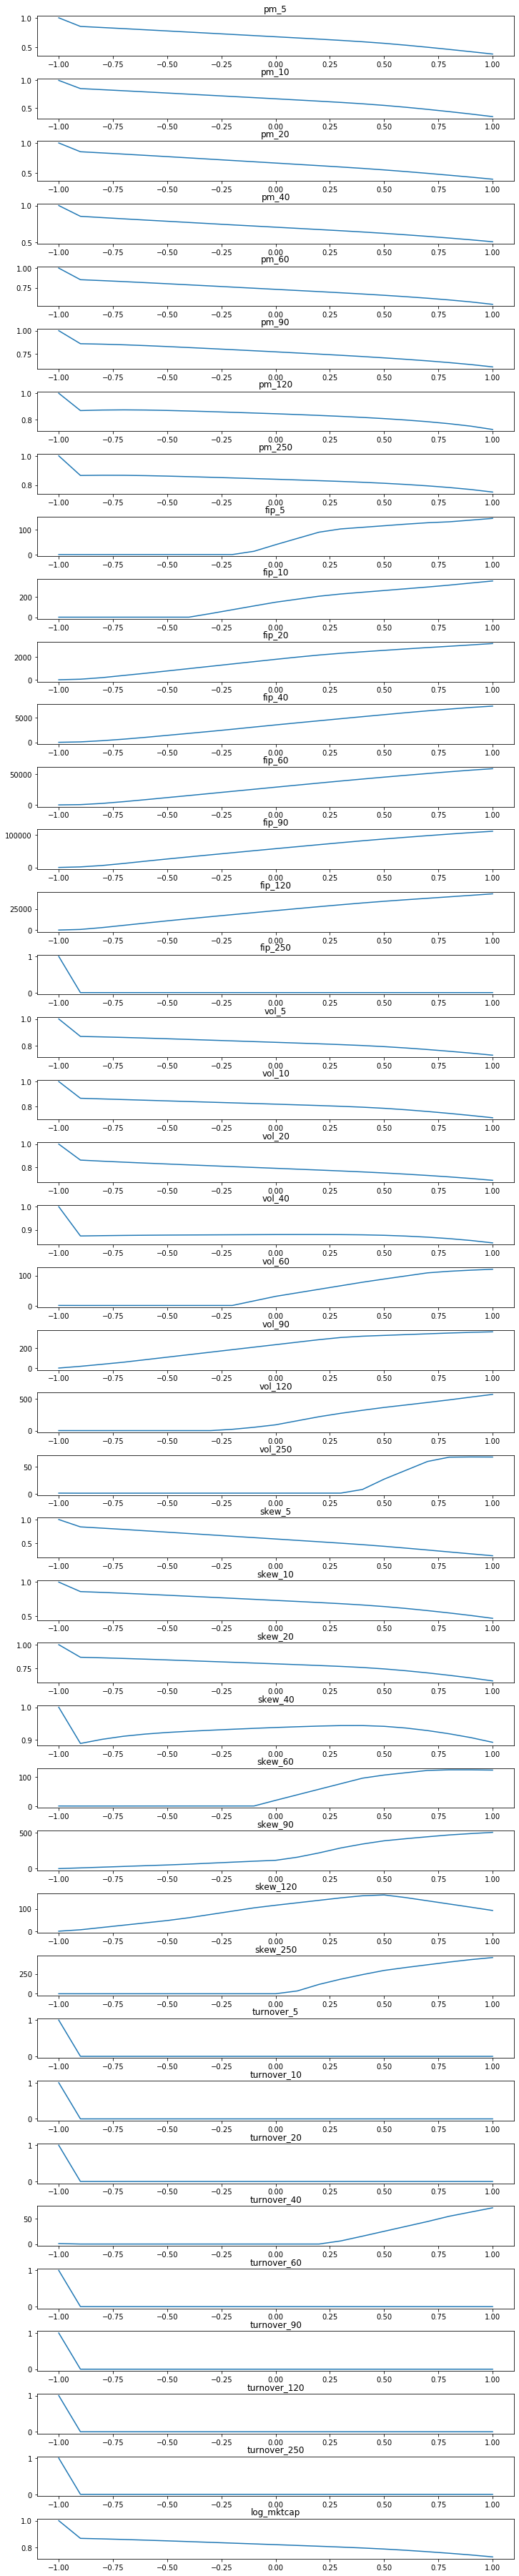

In [37]:
# Style 14
traversals = np.zeros((len(traverse), 41))
for i in range(len(index)):
    x = trainer.trainset[index[i]].to(ssvae.device)
    qz_x, px_z, style_score = ssvae(x.unsqueeze(0), K=100)

    traversal = []
    for t in traverse:
        t_style = torch.zeros_like(style_score).to(ssvae.device)
        t_style[0, :] = style_score[0]
        t_style[0, 13] = t
        recon, _ = ssvae.dec(t_style)
        traversal.append(recon.squeeze(0).cpu().detach().numpy())
    traversal = np.array(traversal)
    for i in range(41):
        if traversal[0, i] == 0.:
            traversal[0, i] += 1e-6
        traversal[:, i] /= traversal[0, i]
    traversal = np.array(traversal)
    traversals += traversal
traversals /= len(index)

fig, axs = plt.subplots(traversals.shape[1], 1)
fig.set_figheight(50)
fig.set_figwidth(10)
fig.tight_layout()
for i in range(traversals.shape[1]):
    axs[i].plot(traverse, traversals[:, i])
    #axs[i].set_ylim(ymax=traversals.max(), ymin=traversals.min())
    axs[i].set_title(mf.columns[2 + i])

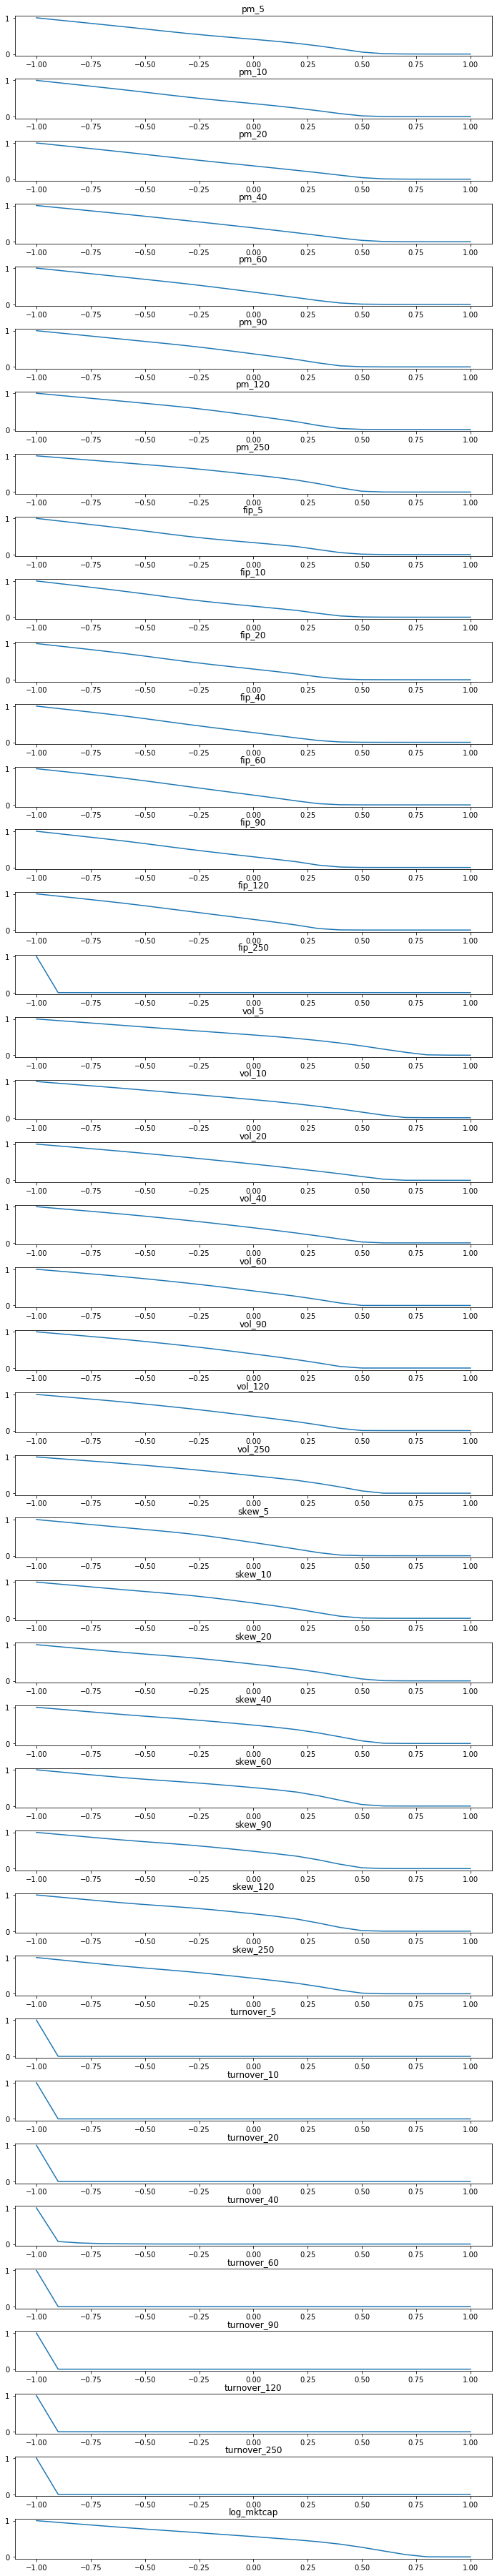

In [38]:
# Style 15
traversals = np.zeros((len(traverse), 41))
for i in range(len(index)):
    x = trainer.trainset[index[i]].to(ssvae.device)
    qz_x, px_z, style_score = ssvae(x.unsqueeze(0), K=100)

    traversal = []
    for t in traverse:
        t_style = torch.zeros_like(style_score).to(ssvae.device)
        t_style[0, :] = style_score[0]
        t_style[0, 14] = t
        recon, _ = ssvae.dec(t_style)
        traversal.append(recon.squeeze(0).cpu().detach().numpy())
    traversal = np.array(traversal)
    for i in range(41):
        if traversal[0, i] == 0.:
            traversal[0, i] += 1e-6
        traversal[:, i] /= traversal[0, i]
    traversal = np.array(traversal)
    traversals += traversal
traversals /= len(index)

fig, axs = plt.subplots(traversals.shape[1], 1)
fig.set_figheight(50)
fig.set_figwidth(10)
fig.tight_layout()
for i in range(traversals.shape[1]):
    axs[i].plot(traverse, traversals[:, i])
    #axs[i].set_ylim(ymax=traversals.max(), ymin=traversals.min())
    axs[i].set_title(mf.columns[2 + i])

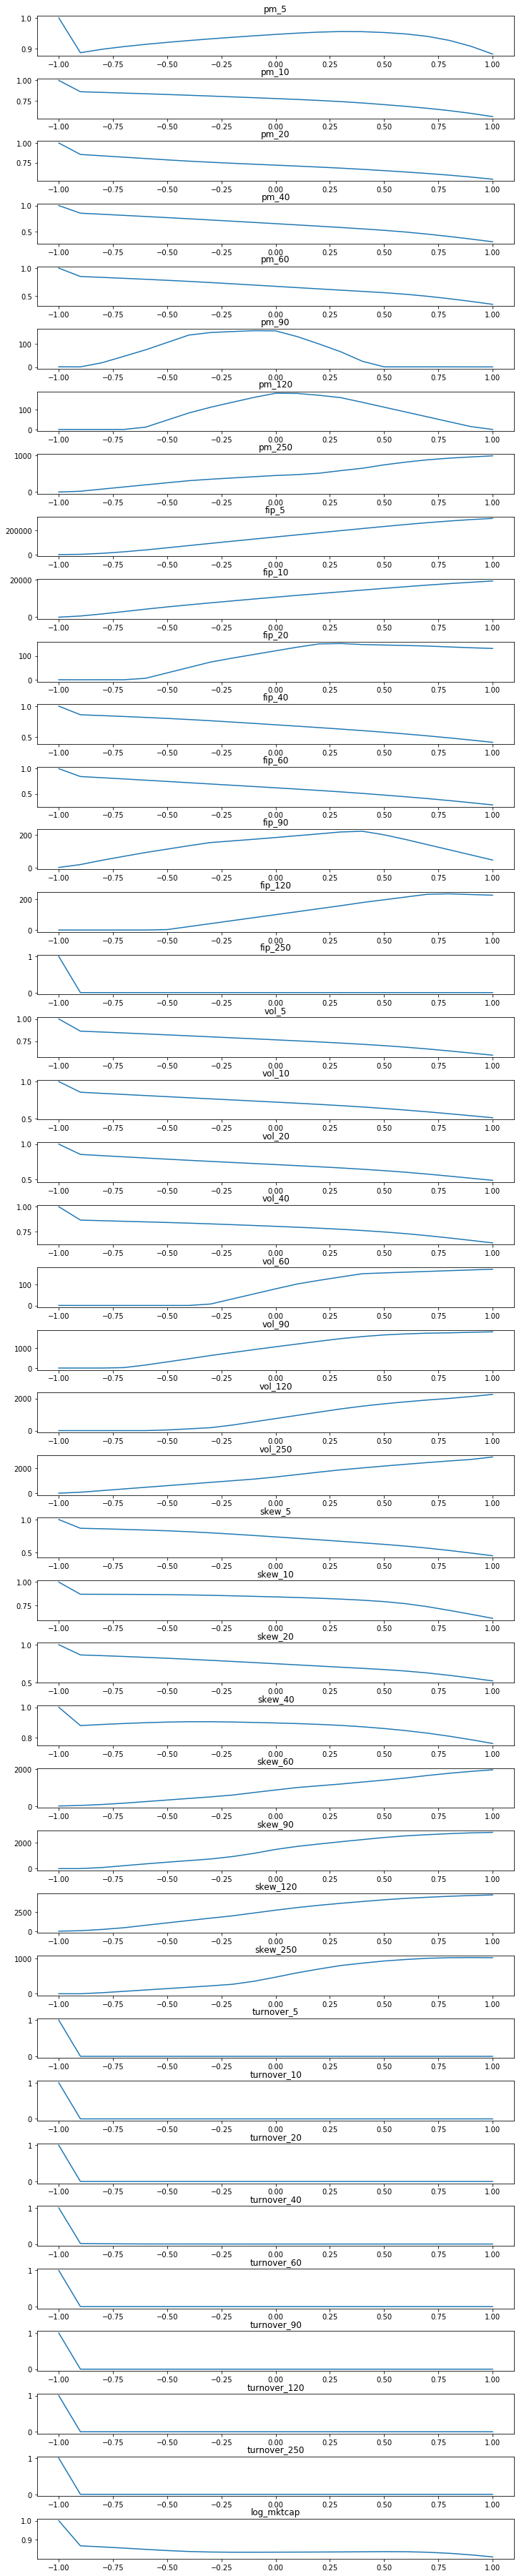

In [39]:
# Style 16
traversals = np.zeros((len(traverse), 41))
for i in range(len(index)):
    x = trainer.trainset[index[i]].to(ssvae.device)
    qz_x, px_z, style_score = ssvae(x.unsqueeze(0), K=100)

    traversal = []
    for t in traverse:
        t_style = torch.zeros_like(style_score).to(ssvae.device)
        t_style[0, :] = style_score[0]
        t_style[0, 15] = t
        recon, _ = ssvae.dec(t_style)
        traversal.append(recon.squeeze(0).cpu().detach().numpy())
    traversal = np.array(traversal)
    for i in range(41):
        if traversal[0, i] == 0.:
            traversal[0, i] += 1e-6
        traversal[:, i] /= traversal[0, i]
    traversal = np.array(traversal)
    traversals += traversal
traversals /= len(index)

fig, axs = plt.subplots(traversals.shape[1], 1)
fig.set_figheight(50)
fig.set_figwidth(10)
fig.tight_layout()
for i in range(traversals.shape[1]):
    axs[i].plot(traverse, traversals[:, i])
    #axs[i].set_ylim(ymax=traversals.max(), ymin=traversals.min())
    axs[i].set_title(mf.columns[2 + i])